## Exploratory Data Analysis

In [218]:
import pandas as pd                                                        
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")
import seaborn as sns
import datetime as dt

In [219]:
data = pd.read_csv("/Users/alvinalindqvist/Desktop/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Is there a relationship between sepal dimensions and petal dimensions? 

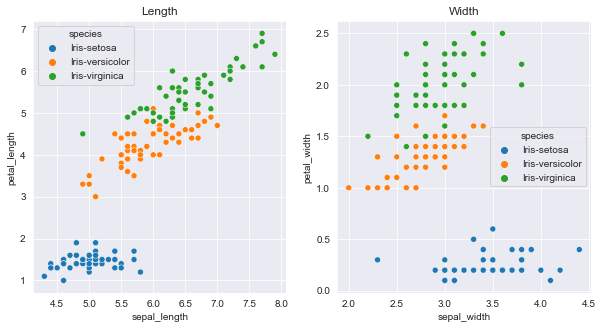

In [220]:
fig, ax = plt.subplots(1, 2, figsize=(10,5)) 
length = sns.scatterplot(data = data, x = "sepal_length", y = "petal_length", hue = "species", ax = ax[0]) 
width = sns.scatterplot(data = data, x = "sepal_width", y = "petal_width", hue = "species", ax = ax[1])
length.set_title("Length")
width.set_title("Width")
plt.show()

In the first figure, it appears that as sepal_length increases, petal_length also increases, suggesting a positive linear relationship. However, the iris-setosa dots (blue) do not follow this linear trend as closely as the other species.

The second figure does not suggest a linear relationship. The data points are scattered in a way with no clear trend between sepal_width and petal_width. However, we can observe that iris-setosa (blue) is clustered within a narrow range of petal_width around 0.1 to 0.3 and sepal_width around 3.0 to 4.5, with less variability for this species. On the other hand, iris-versicolor (orange) and iris-virginica (green) show wider spreads, with iris-virginica displaying the largest values for both sepal_width and petal_width.

### How are the sepal and petal dimensions distributed?

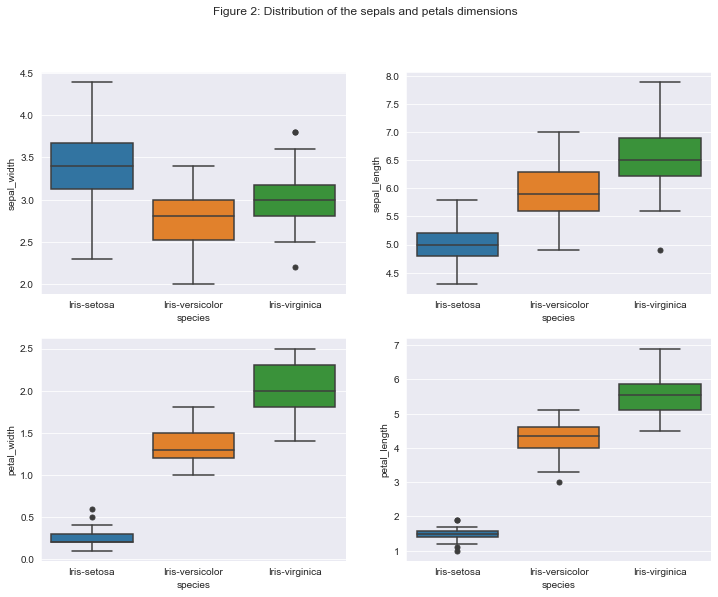

In [221]:
fig, ax = plt.subplots(2, 2, figsize = (12,9))

s_width=sns.boxplot(data=data, x = "species", y = "sepal_width", flierprops = {"marker": "o"}, ax = ax[0,0] )
s_length=sns.boxplot(data=data, x = "species", y = "sepal_length", flierprops = {"marker": "o"}, ax = ax[0,1])
p_width=sns.boxplot(data=data, x = "species", y = "petal_width", flierprops = {"marker": "o"}, ax = ax[1,0] )
p_length=sns.boxplot(data=data,x = "species", y = "petal_length", flierprops = {"marker": "o"}, ax = ax[1,1])

fig.suptitle("Figure 2: Distribution of the sepals and petals dimensions")
plt.show()

The Iris-setosa species has the smallest values and lowest variability in petal and sepal dimensions, except for sepal width, where it shows the largest range. Iris-versicolor and Iris-virginica have similar distributions, but Iris-virginica consistently has larger dimensions, making it the species with the most prominent sizes overall.

### Generate a pair-plot and briefly, mention how the different variables are related to each other.

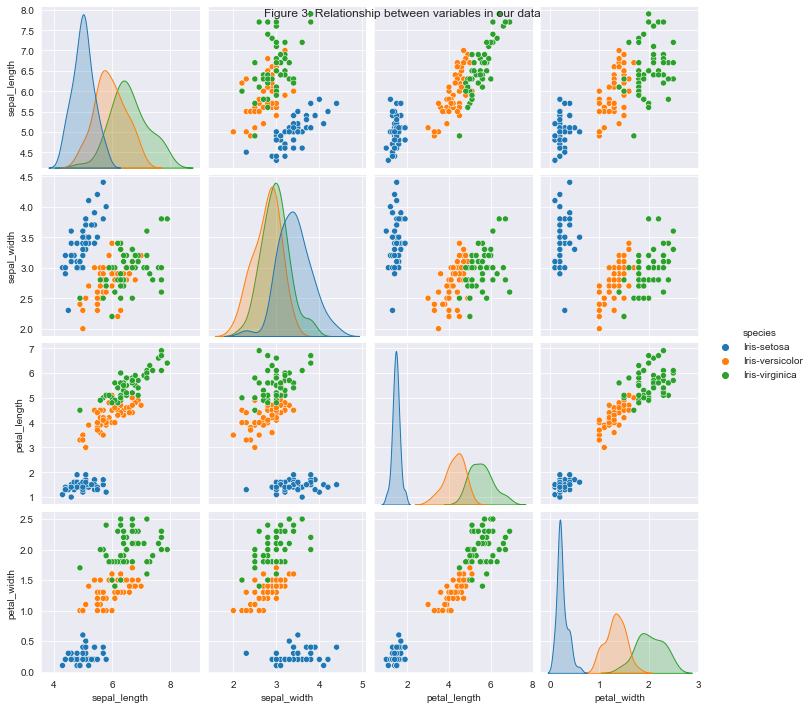

In [222]:
g = sns.pairplot(data=data, hue = "species")
g.fig.suptitle("Figure 3: Relationship between variables in our data")
plt.show()

For all three species, both sepal and petal dimensions (length and width) show a clear correlation.

# Birdwatching

In [223]:
art_data = pd.read_csv("/Users/alvinalindqvist/Desktop/artportalen.csv")
art_data.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,Lokalnamn,Ostkoordinat,Nordkoordinat,Noggrannhet,Diffusion,Län,Kommun,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,Tivoli,1626780,6585860,125,0,Stockholm,Solna,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


In [224]:
art_data = art_data .replace(["noterad", "Ej återfunnen"], [1,0])
art_data["Antal"] = pd.to_numeric(art_data ["Antal"])

### What are the most prevelant species?

In [225]:
pd.set_option('display.max_columns', None) 

art_data_drop = art_data.loc[:, ["Artnamn", "Antal"]]
art_data_goruping = art_data_drop.groupby(["Artnamn"]).sum() 
art_data_sorting = art_data_goruping.sort_values(by = ["Antal"], ascending = False)

art_data_sorting.head()

,Antal
Artnamn,
Grönsiska,20237
Sothöna,8393
Gräsand,7296
Storskrake,6800
Vitkindad gås,6391


The five most common species is represented in the table above. The 3 most prevelant species is Grönsiska, Sothöna and Gräsand. 

### What is the monthly distribution of the top 3 most prevelant species

In [226]:
top3 = art_data.loc[:,["Artnamn","Startdatum", "Antal"]] 
top3 = top3.query("Artnamn == 'Grönsiska' | Artnamn == 'Sothöna' | Artnamn == 'Gräsand'", inplace = False) #Filter only top 3

In [227]:
top3["Month"] = pd.to_datetime(top3["Startdatum"], errors = "coerce").dt.strftime("%b")
monthly_distribution = top3.groupby(["Month", "Artnamn"])["Antal"].sum().unstack()
monthly_distribution

Artnamn,Gräsand,Grönsiska,Sothöna
Month,,,
Apr,892,6,638
Feb,1591,658,2104
Jan,2975,19517,2148
Jun,106,7,112
Mar,1204,38,3093
May,528,11,298


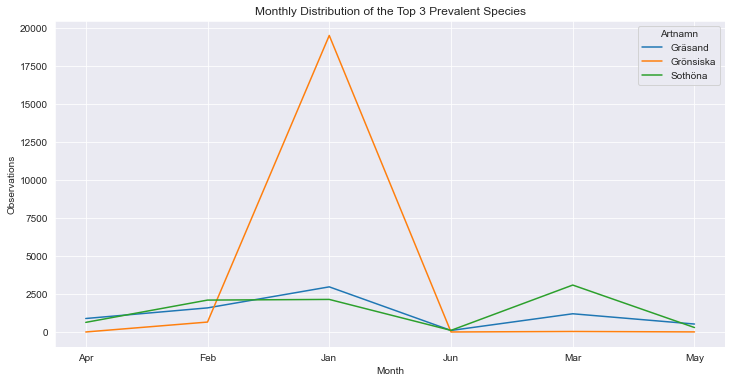

In [228]:
monthly_distribution.plot(kind="line", figsize=(12, 6))
plt.title("Monthly Distribution of the Top 3 Prevalent Species")
plt.ylabel("Observations")
plt.show()

### What are the rarest species?

In [229]:
art_data_sorting.tail(25) 

,Antal
Artnamn,
Ljungpipare,2
Lärkfalk,2
Spetsbergsgås,2
Stenfalk,2
Fiskgjuse,2
Vinterhämpling,1
Trädlärka,1
Ägretthäger,1
Varfågel,1


The table above shows the species who has only been sighted maximum 2 times.

### My 3 generated questions

#### 1. In which kommun has the least sightings been recorded?

In [259]:
kommuner = art_data.loc[:, ["Antal", "Kommun"]] 
kommuner = kommuner.groupby(["Kommun"]).sum()
kommuner_sorted = kommuner.sort_values(by="Antal", ascending = True)
kommuner_sorted.head(1)

,Antal
Kommun,
Lidingö,1442


We can see that Lidingö has the least sightings. 

#### 2. In which kommun is Blåmes most prevalent?

In [241]:
Blåmes = art_data.loc[:,["Antal","Kommun", "Artnamn"]] 
Blåmes = Blåmes.query("Artnamn == 'Blåmes'", inplace = False) 

Blåmes = Blåmes.groupby(["Kommun"]).sum(["Antal"])
Blåmes.head()

,Antal
Kommun,
Sollentuna,188
Solna,126
Stockholm,1776


We can see that Blåmes is most pravelent in Stockholm. 

#### 3. Are the rarest species related to its status in rödlistan?


In [246]:
rodlist = art_data.loc[:,["Antal","Kommun", "Artnamn", "Rödlistade"]]
rodlist = rodlist.query("Artnamn == 'Gravand' | Artnamn == 'Strömstare' | Artnamn == 'Rosenfink'", inplace = False)  
rodlist.head()

,Antal,Kommun,Artnamn,Rödlistade
815,1,Sollentuna,Strömstare,NaN
15397,1,Stockholm,Gravand,NT
18741,1,Stockholm,Rosenfink,NT


Gravand and Rosenfink has the code NT which means that they are close to becoming threatened, but for Strömstare there is no information. This suggests there could be a possible relationship between the rarity of a species and its status in the rödlistan, but we cannot confirm this with certainty based on the current data. 

# Predicting strokes

In [244]:
stroke = pd.read_csv("/Users/alvinalindqvist/Desktop/stroke-data.csv")
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### 1. Are there gender differences in stroke cases?

In [247]:
stroke["gender"].value_counts(dropna = False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [249]:
strokes_gender = stroke.loc[:,["gender","stroke"]]
strokes_gender_grouping = strokes_gender.groupby(["gender"]).sum(["stroke"])
strokes_gender_grouping.head()

,stroke
gender,
Female,141
Male,108
Other,0


We can observe that the total amount of women in the data (2994) is higher than the amount of men (2115). When we look at the stroke cases we can see that the number of registred stroke cases for women is 141 and for men 108. But to make a fair comparison, we need to normalize these values by the population size of each gender, calculating the percentage of stroke cases within each gender group to draw more accurate conclusions.

#### 2. Does heart disease increase the chances of having a stroke?

In [251]:
stroke_heart_disease = stroke.groupby('heart_disease')['stroke'].mean() * 100
stroke_heart_disease

heart_disease
0     4.178734
1    17.028986
Name: stroke, dtype: float64

We can see that heart disease seems to significantly increases the risk of having a stroke. However, other factors may also contribute to the risk and should be considered in the analysis. 

### What is the impact of average glucose level on the risk of stroke?

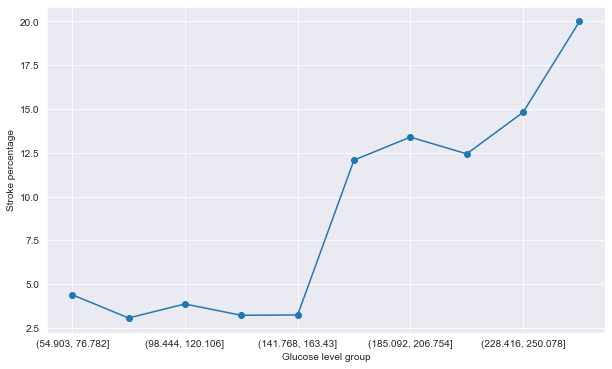

In [256]:
stroke_glucose = stroke.groupby(pd.cut(stroke["avg_glucose_level"], bins = 10))["stroke"].mean() * 100
stroke_glucose.plot(kind="line", figsize = (10, 6), marker = 'o')
plt.xlabel("Glucose level group")
plt.ylabel("Stroke percentage")
plt.show()

From the plot above, we can see that the risk of having a stroke increases significantly in relation to glucose levels. But we still need to analyze other factors to draw conclusions.

# Data Preparation

In [54]:
dataprep = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/main/cell_phones_total.csv")
dataprep

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,20,NaN,NaN,1720,3000,3400,5380,12k,15k,53k,61.8k,70k,98.4k,103k,109k,114k,121k,128k,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25k,200k,600k,1.2M,2.52M,4.67M,7.9M,10.5M,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,1820,1990,3300,7050,9820,24k,25.8k,75k,140k,350k,740k,1.61M,3.05M,4.96M,6.77M,8.11M,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2300,3300,5600,11k,29.8k,393k,851k,1.1M,1.26M,1.53M,1.91M,2.32M,1.86M,2.46M,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,770,780,784,2830,5490,8620,14.1k,20.6k,23.5k,29.4k,32.8k,51.9k,58.4k,64.6k,69k,63.5k,64.2k,64.5k,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562k,562k,562k,562k,562k,562k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1550,5170,8190,8250,8810,12.2k,16.1k,27.7k,32k,148k,487k,675k,1.48M,2.28M,2.98M,4.35M,6.45M,8.31M,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,NaN
211,ZAF,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3980,5680,7100,12.5k,40k,340k,535k,953k,1.84M,3.34M,5.19M,8.34M,10.8M,13.7M,16.9M,20.8M,34M,39.7M,42.3M,45M,46.4M,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1550,2720,4550,8260,28.2k,98.9k,121k,139k,241k,464k,950k,1.66M,2.64M,3.54M,4.41M,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


We will use df.info() to get information about each column and df.isnull().sum() to check for missing values in each column.

In [58]:
dataprep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

We need to convert the strings to numbers.

In [59]:
dataprep.isnull().sum()

iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64

In [63]:
for cell in range(len(dataprep)):
    if np.isnan(dataprep.loc[cell,'1960']):
        dataprep.loc[cell,'1960'] = 0.0

cleaned_dataprep = dataprep.fillna(method='ffill', axis= 1)
cleaned_dataprep

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,20,1720,3000,3400,5380,12k,15k,53k,61.8k,70k,98.4k,103k,109k,114k,121k,128k,132k,132k,135k,139k,140k,141k,141k,141k,141k,141k
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25k,200k,600k,1.2M,2.52M,4.67M,7.9M,10.5M,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,1820,1990,3300,7050,9820,24k,25.8k,75k,140k,350k,740k,1.61M,3.05M,4.96M,6.77M,8.11M,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2300,3300,5600,11k,29.8k,393k,851k,1.1M,1.26M,1.53M,1.91M,2.32M,1.86M,2.46M,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,770,780,784,2830,5490,8620,14.1k,20.6k,23.5k,29.4k,32.8k,51.9k,58.4k,64.6k,69k,63.5k,64.2k,64.5k,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k,562k
210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1550,5170,8190,8250,8810,12.2k,16.1k,27.7k,32k,148k,487k,675k,1.48M,2.28M,2.98M,4.35M,6.45M,8.31M,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,15.3M
211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3980,5680,7100,12.5k,40k,340k,535k,953k,1.84M,3.34M,5.19M,8.34M,10.8M,13.7M,16.9M,20.8M,34M,39.7M,42.3M,45M,46.4M,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1550,2720,4550,8260,28.2k,98.9k,121k,139k,241k,464k,950k,1.66M,2.64M,3.54M,4.41M,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


We are now changing k, M and B to e^3, e^6 and e^9 and change the type to float.

In [257]:
cleaned_dataprep.iloc[:,1:] = cleaned_dataprep.iloc[:,1:]\
    .replace({'k' :'e3', 'M' : 'e6', 'B': 'e9'}, regex = True)\
    .astype(float)

In [258]:
cleaned_dataprep[['iso-3','2015','2016', '2017', '2018', '2019']].sort_values('2015', ascending = False).head()

,iso-3,2015,2016,2017,2018,2019
35,CHN,1290000000.0,1360000000.0,1470000000.0,1650000000.0,1730000000.0
87,IND,1000000000.0,1130000000.0,1170000000.0,1180000000.0,1150000000.0
200,USA,382000000.0,396000000.0,400000000.0,422000000.0,422000000.0
86,IDN,339000000.0,386000000.0,435000000.0,319000000.0,345000000.0
26,BRA,258000000.0,244000000.0,218000000.0,207000000.0,207000000.0


The dataset was cleaned by filling missing values using forward fill and replacing empty values at the start with zeros. Strings like "k", "M", and "B" were converted to numbers. Data for 2015–2019 was sorted by 2015 values in descending order. The result is a clean table with no missing data or text formats.